### Experiment 6: Single Graph Traversal

In [1]:
import sys
sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt
from GraphDataset import GraphDataset, MultiGraphDataset
from creditlearning import CreditLearner

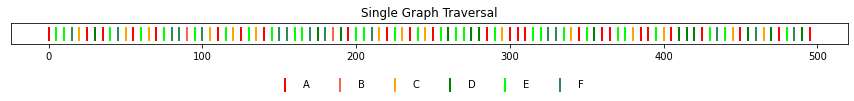

Number of edges =  36


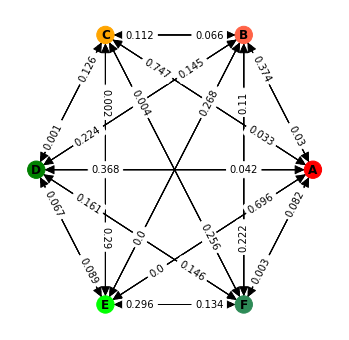

[[0.12 0.03 0.03 0.04 0.7  0.08]
 [0.37 0.04 0.07 0.14 0.27 0.11]
 [0.75 0.11 0.01 0.13 0.   0.  ]
 [0.37 0.22 0.   0.18 0.07 0.16]
 [0.   0.   0.29 0.09 0.32 0.3 ]
 [0.   0.22 0.26 0.15 0.13 0.24]]


In [8]:
np.random.seed(500)
numNodes = 6
dt = 0.01

colours = ["red","tomato","orange","green",
            "lime","seagreen","blue","indigo",
            "purple","pink","black","yellow","violet","brown"]

graph1 = GraphDataset(numNodes=numNodes,p=1.0,scale=(5,2e-10),
                      dist=lambda x,i:np.random.power(0.3,x),uniformTransitions=False,
                      uniformTime=1,dt=dt,
                     colours=colours,labels='ABCDEFGHIJKLM')

graph1.generateEvents(10000,cutoff=1)

graph1.plotEvents(end=100,title=r'Single Graph Traversal',
                  savefig=True,figname='figs_for_paper/experiment6/processStream.png',
                  figsize=(15,0.4),linewidths=2,legend_loc='lower center',
                  legend_anchor=(0.5,-2.5),ncol=numNodes,fancybox=1,edgecolor='1.0')

graph1.plotGraph(figsize=(6,6),withProbs=1,savefig=True,figname='figs_for_paper/experiment6/trueProbs.png')
tm = graph1.getTransitionMatrix(printIt=False)
print(np.around(tm,2))

trainRatio = 0.8
trainIndex = int(trainRatio*len(graph1.events))



Number of edges =  36


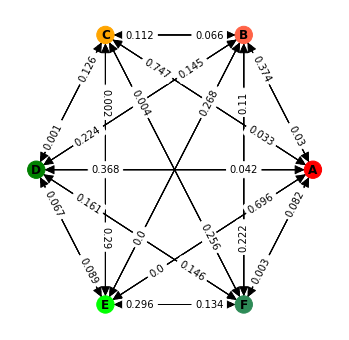

In [3]:
graph1.plotGraph(figsize=(6,6),withProbs=1)

In [5]:
print("Optimal Accuracy on Test Set = ", graph1.optimalAccuracy(start=trainIndex))
print("Optimal Perplexity on Test Set = ", graph1.optimalPerplexity(start=trainIndex)[0])
print("Baseline Perplexity on Test Set = ", graph1.optimalPerplexity(start=trainIndex)[1])

Optimal Accuracy on Test Set =  0.4667466746674667
Optimal Perplexity on Test Set =  3.4296675930726903
Baseline Perplexity on Test Set =  5.4979320427642415


In [11]:
trainIndices

array([ 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500,
       6000, 6500, 7000, 7500])

In [12]:
trainIndices = (np.arange(0.05,trainRatio,0.05)*len(graph1.events)).astype(int)
testIndices = (np.arange(trainRatio,1.05,0.05)*len(graph1.events)).astype(int)
clgraph = CreditLearner(tau_min=0.01,tau_max=300,num_taustars=200,
                        delta_min=0.1,delta_max=100,k=8,dt=dt,num_stimuli=numNodes,
                        lrM=1,lrC=1,stimuli_labels=graph1.labels)

accuracies = np.zeros(len(trainIndices))
accuraciesM = np.zeros(len(trainIndices))
perplexities = np.zeros(len(trainIndices))
perplexitiesM = np.zeros(len(trainIndices))

#clgraph.prelearnM(f=graph1.eventsOneHot[:,0:trainIndices[-1]],event_times=graph1.timeInds[0:trainIndices[-1]])

for i in range(len(trainIndices)):
    clgraph.resetF()
    clgraph.prelearnM(f=graph1.eventsOneHot[:,0:trainIndices[i]],event_times=graph1.timeInds[:trainIndices[i]])
    clgraph.learnCreditFast(f=graph1.eventsOneHot[:,:trainIndices[i]],
                        event_times=graph1.timeInds[:trainIndices[i]],
                        suppressM=True,adaptlr=True,verbose=500)
    
#     clgraph.learnCreditFast(f=graph1.eventsOneHot[:,trainIndices[i]:trainIndices[i+1]],
#                         event_times=graph1.timeInds[trainIndices[i]:trainIndices[i+1]],
#                         suppressM=False,adaptlr=True,verbose=0)

    for j in range(len(testIndices)-1):
        accuracy, accuracyM, perplexity, perplexityM = clgraph.predictOnSequence(f=graph1.eventsOneHot[:,testIndices[j]:testIndices[j+1]],
                                        event_times=graph1.timeInds[testIndices[j]:testIndices[j+1]],
                                        withMprediction=True, verbose=0,returnPredictions=False)
    
        accuracies[i] += accuracy/(len(testIndices)-1)
        accuraciesM[i] += accuracyM/(len(testIndices)-1)
        perplexities[i] += perplexity/(len(testIndices)-1)
        perplexitiesM[i] += perplexityM/(len(testIndices)-1)



Reached event:  0 / 500
Accuracy C :  0.48697394789579157
Accuracy M :  0.45691382765531063
Baseline probability :  0.2985971943887776
Accuracy C :  0.4248496993987976
Accuracy M :  0.43286573146292584
Baseline probability :  0.2985971943887776
Accuracy C :  0.4969939879759519
Accuracy M :  0.5090180360721442
Baseline probability :  0.2905811623246493
Accuracy C :  0.44889779559118237
Accuracy M :  0.4308617234468938
Baseline probability :  0.31462925851703405
Reached event:  0 / 1000
Reached event:  500 / 1000
Accuracy C :  0.4709418837675351
Accuracy M :  0.4529058116232465
Baseline probability :  0.2985971943887776
Accuracy C :  0.4348697394789579
Accuracy M :  0.42685370741482964
Baseline probability :  0.2985971943887776
Accuracy C :  0.48096192384769537
Accuracy M :  0.48296593186372744
Baseline probability :  0.2905811623246493
Accuracy C :  0.4308617234468938
Accuracy M :  0.43687374749499
Baseline probability :  0.31462925851703405
Reached event:  0 / 1500
Reached event:  500 

Reached event:  0 / 7000
Reached event:  500 / 7000
Reached event:  1000 / 7000
Reached event:  1500 / 7000
Reached event:  2000 / 7000
Reached event:  2500 / 7000
Reached event:  3000 / 7000
Reached event:  3500 / 7000
Reached event:  4000 / 7000
Reached event:  4500 / 7000
Reached event:  5000 / 7000
Reached event:  5500 / 7000
Reached event:  6000 / 7000
Reached event:  6500 / 7000
Accuracy C :  0.4789579158316633
Accuracy M :  0.48897795591182364
Baseline probability :  0.2985971943887776
Accuracy C :  0.43687374749499
Accuracy M :  0.46092184368737477
Baseline probability :  0.2985971943887776
Accuracy C :  0.4709418837675351
Accuracy M :  0.4749498997995992
Baseline probability :  0.2905811623246493
Accuracy C :  0.4408817635270541
Accuracy M :  0.4649298597194389
Baseline probability :  0.31462925851703405
Reached event:  0 / 7500
Reached event:  500 / 7500
Reached event:  1000 / 7500
Reached event:  1500 / 7500
Reached event:  2000 / 7500
Reached event:  2500 / 7500
Reached eve

In [15]:
graph1.optimalPerplexity(start=trainIndex)

(3.4296675930726903, 5.4979320427642415)

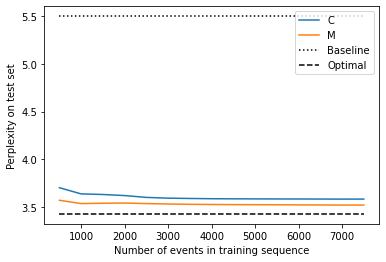

In [19]:
plt.figure()
start = 0
plt.xlabel("Number of events in training sequence")
plt.ylabel("Perplexity on test set")
plt.plot(trainIndices[start:],perplexities[start:],label="C")
plt.plot(trainIndices[start:],perplexitiesM[start:],label="M")
plt.hlines(graph1.optimalPerplexity(start=trainIndex)[1],xmin=trainIndices[start],xmax=trainIndices[-1],color='k',ls='dotted',label="Baseline")
plt.hlines(graph1.optimalPerplexity(start=trainIndex)[0],xmin=trainIndices[start],xmax=trainIndices[-1],color='k',ls='dashed',label="Optimal")
plt.legend()
#plt.savefig('figs_for_paper/experiment6/Moptimality.png')


In [ ]:
clgraph = CreditLearner(tau_min=0.01,tau_max=300,num_taustars=200,
                        delta_min=0.1,delta_max=100,k=8,dt=dt,num_stimuli=numNodes,
                        lrM=1,lrC=1,stimuli_labels=graph1.labels)
clgraph.prelearnM(f=graph1.eventsOneHot[:,:trainIndex],event_times=graph1.timeInds[:trainIndex])
clgraph.learnCreditFast(f=graph1.eventsOneHot[:,:trainIndex],
                        event_times=graph1.timeInds[:trainIndex],
                        suppressM=True,adaptlr=True,verbose=500)


In [ ]:
clgraph.plotCredit(scalebymax=True,colours=graph1.colours,savefig=False,prefix="figs_for_paper/experiment6/")

In [ ]:
clgraph.plotM()

In [ ]:
predictions, predictionsM, accuracy, accuracyM, perplexity, perplexityM = clgraph.predictOnSequence(f=graph1.eventsOneHot[:,trainIndex:],
                                        event_times=graph1.timeInds[trainIndex:],
                                        withMprediction=True, verbose=1000,returnPredictions=True)

print("Perplexity C = ", perplexity)
print("Perplexity M = ",perplexityM)

In [ ]:
print("Reconstructed Graph for C")
clgraph.graphCredit(CorM='C',thresh_pct=0.3,colours=colours,usearea=0,figsize=(10,10),thickness_factor=1,savefig=False,prefix="figs_for_paper/experiment6/")
print("Reconstructed Graph for M")
clgraph.graphCredit(CorM='M',thresh_pct=0.4,colours=graph1.colours,figsize=(10,10),thickness_factor=1,savefig=False,prefix="figs_for_paper/experiment6/")